In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from src.clustering.kmeans import KMeans_Scratch
from src.metrics.internal import (
    calinski_harabasz_score_scratch,
    davies_bouldin_score_scratch,
    silhouette_score_scratch,
    calculate_wcss
)
from src.metrics.external import confusion_matrix_scratch,purity_score_scratch,entropy_scratch,normalized_mutual_information_scratch,adjusted_rand_index_scratch

 


In [3]:
import pandas as pd

df=pd.read_csv('D:\K_means-GMM-Pca-AutoEncoder_From_Scratch\data.csv')

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.drop(columns=['Unnamed: 32'],inplace=True)

In [7]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.drop(columns=['id'],inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum().sum()

0

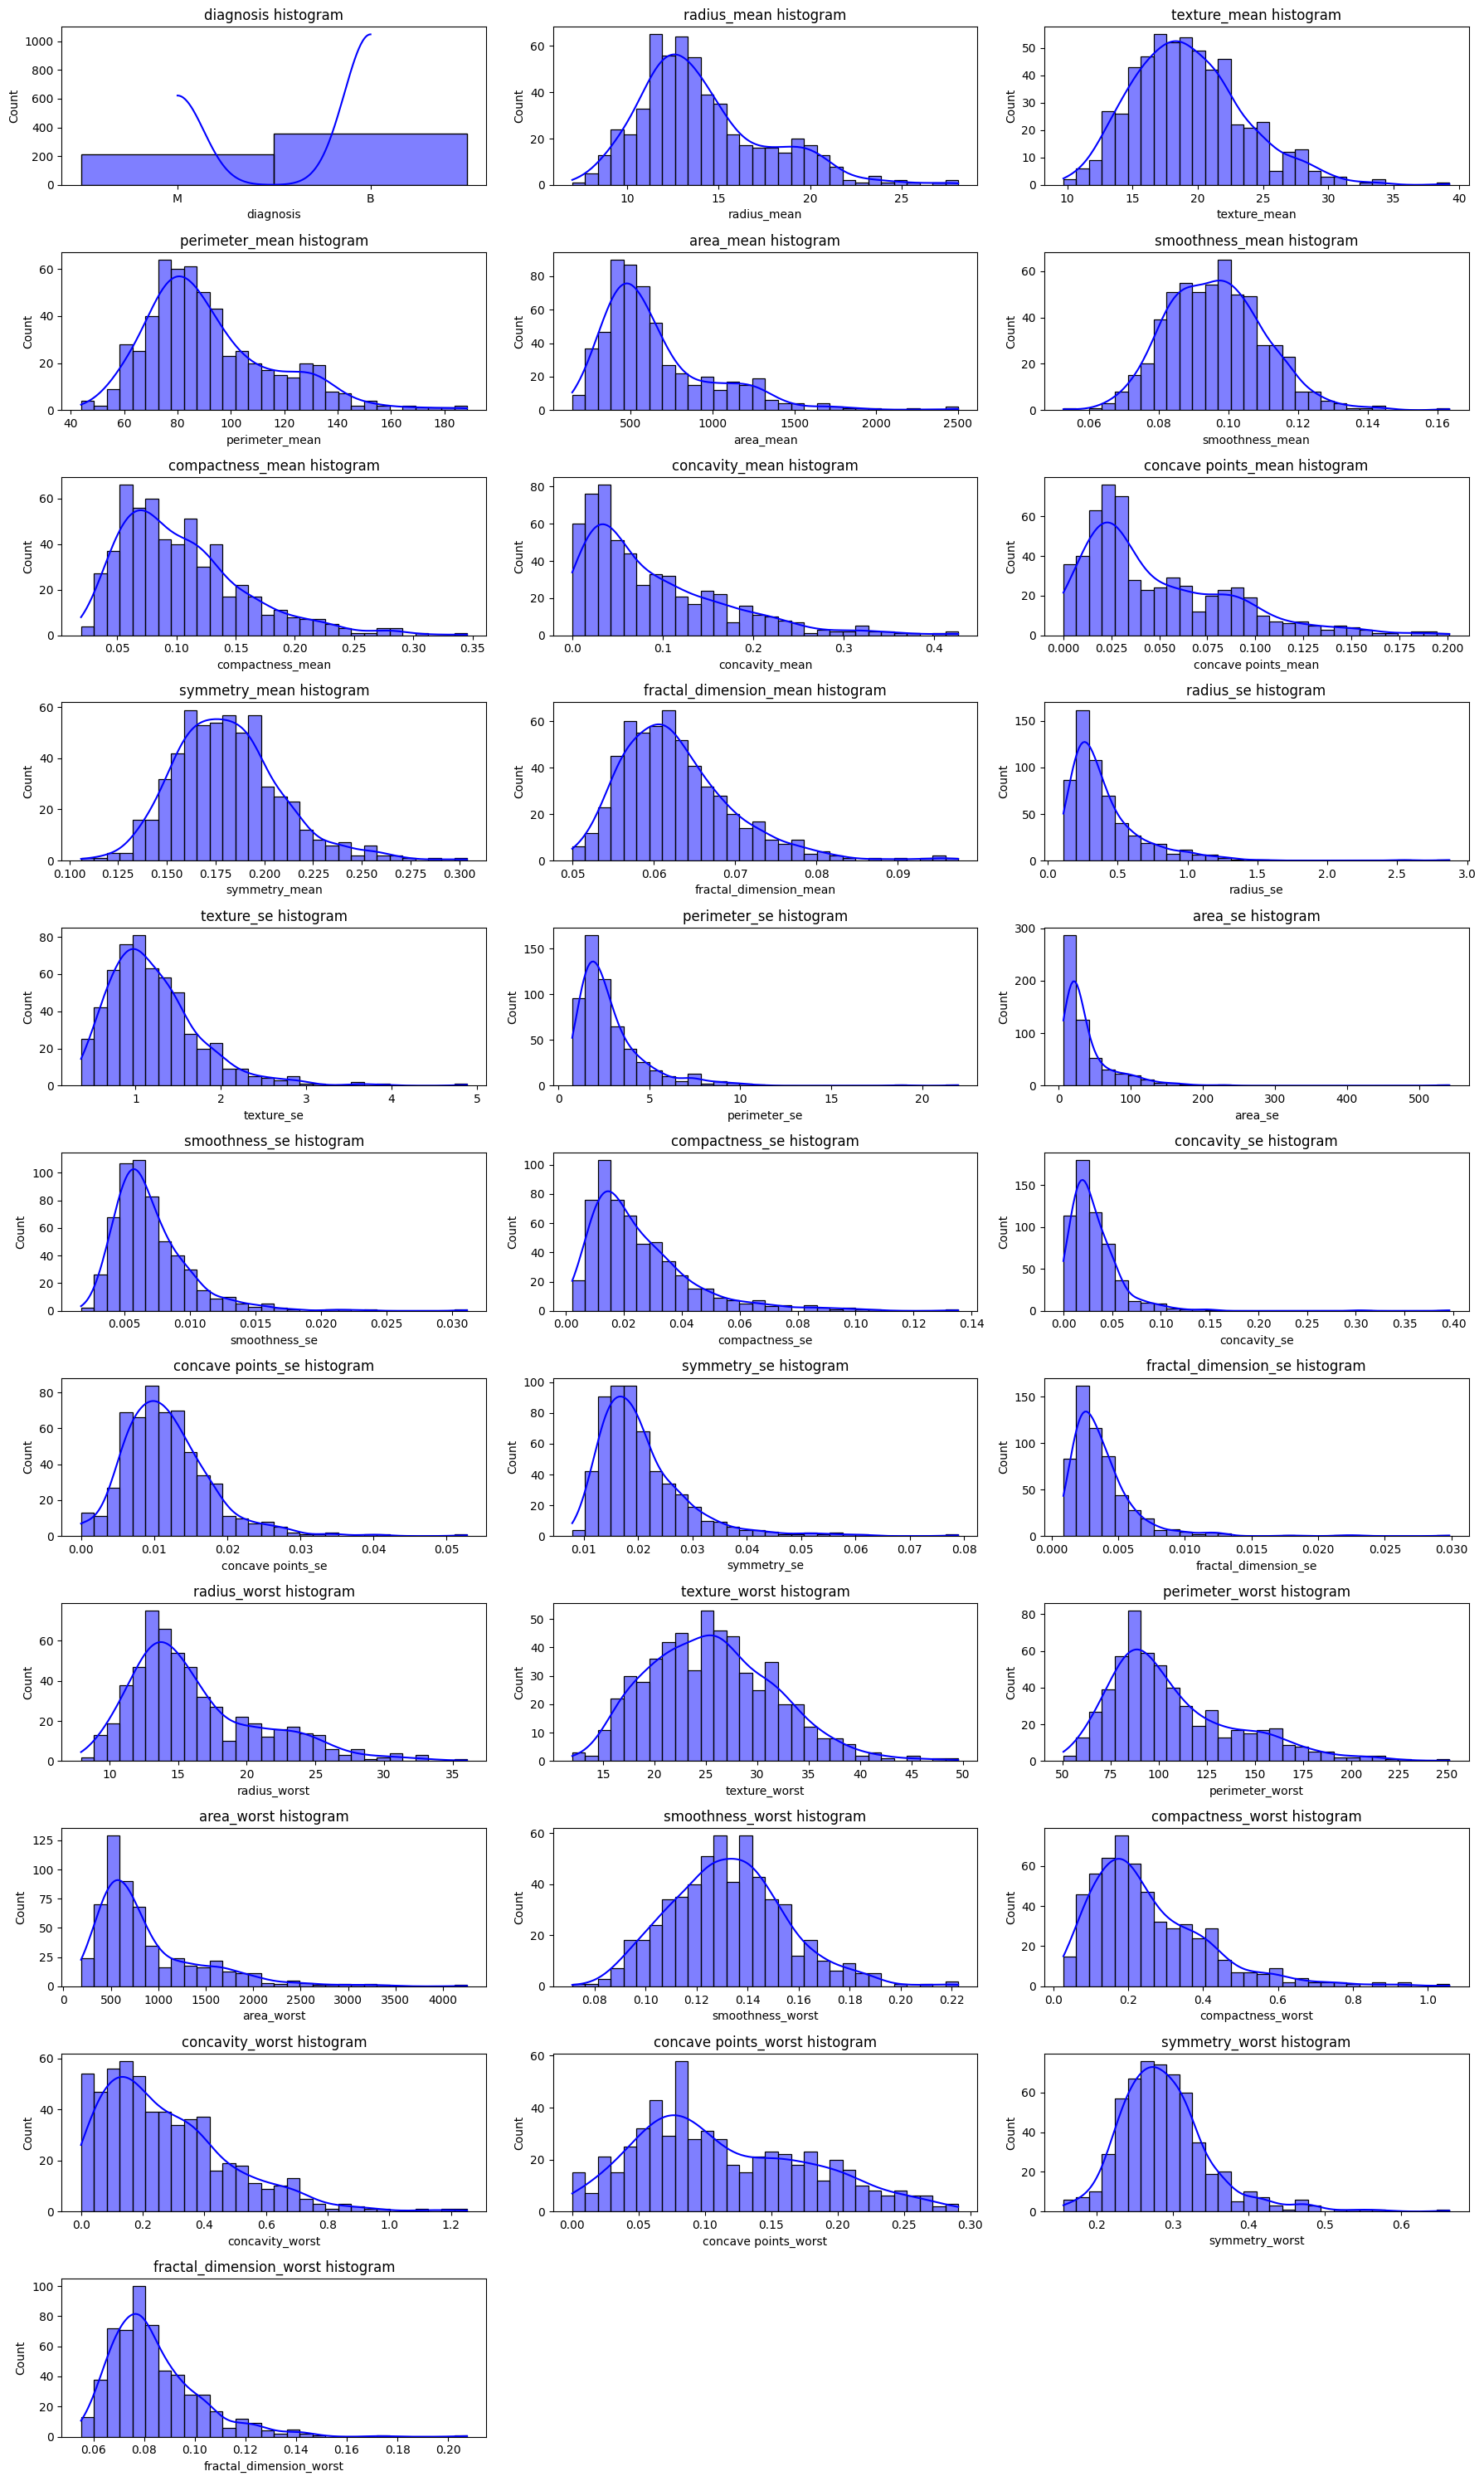

In [11]:
plt.figure(figsize=(18, 30))

for i, bf in enumerate(df.columns):
    plt.subplot(11, 3, i+1)
    sns.histplot(x=bf, data=df, kde=True, color='blue', bins=30)

    plt.title(f'{bf} histogram')
plt.tight_layout()
plt.show()

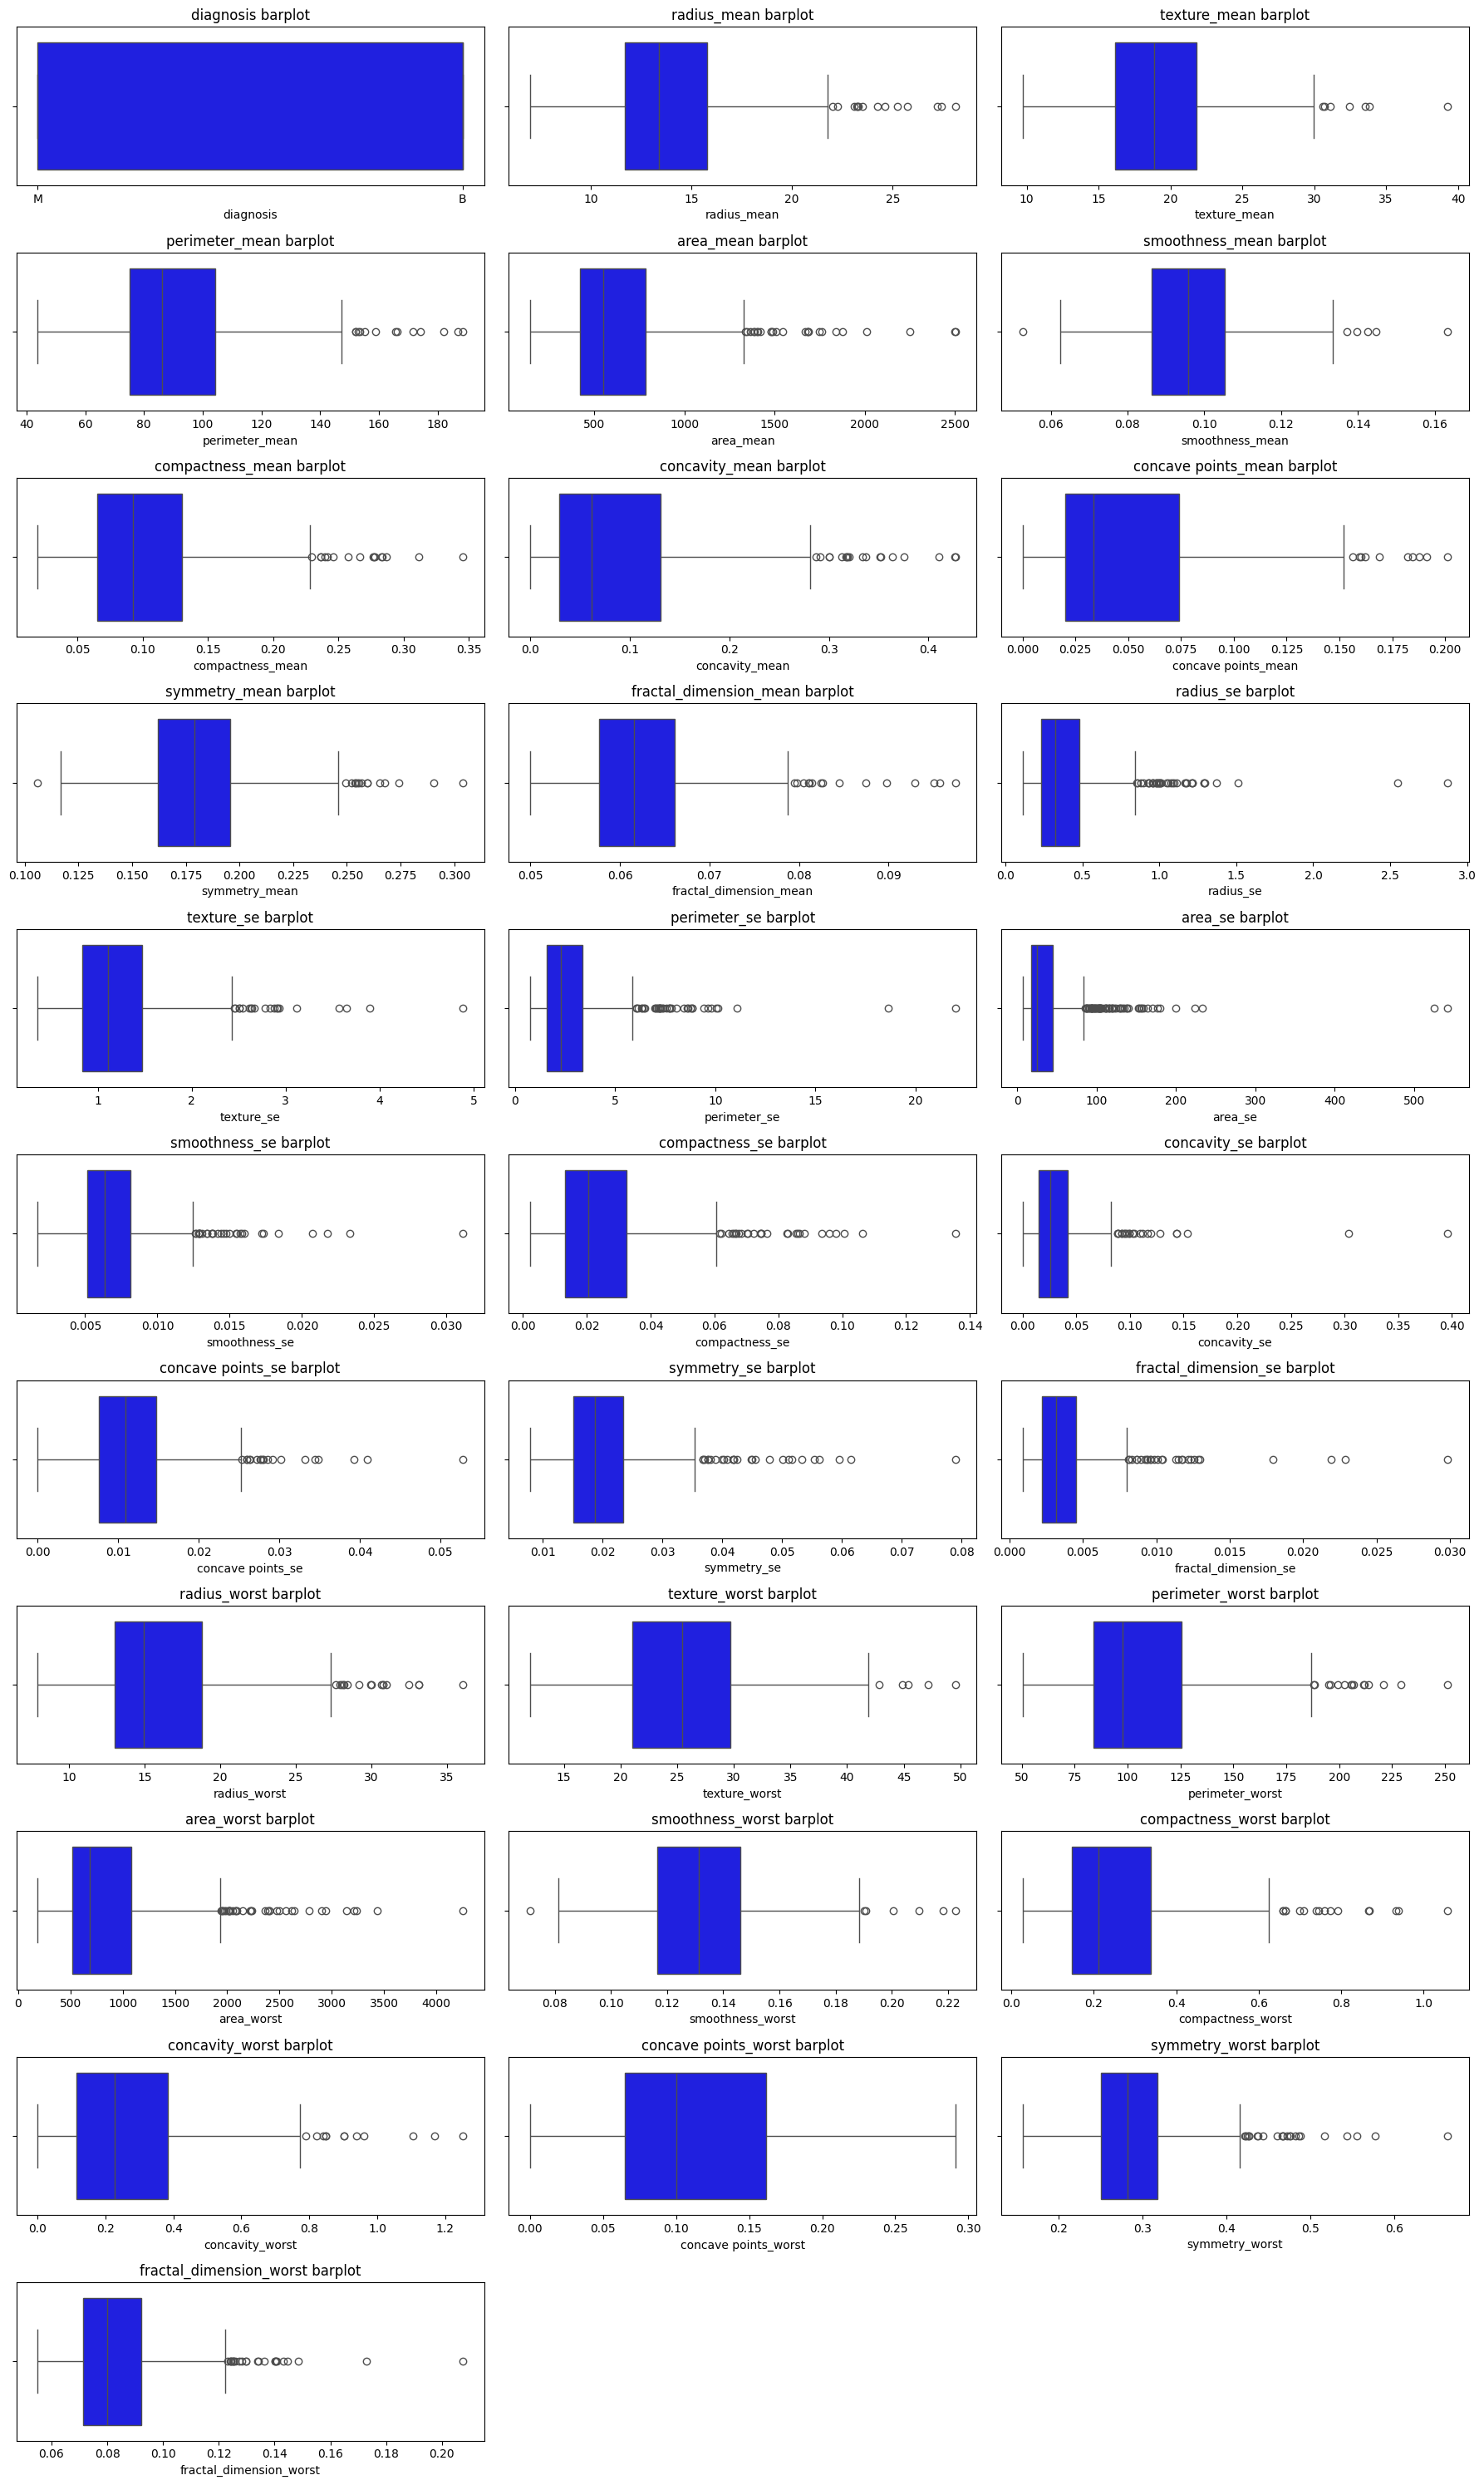

In [12]:
plt.figure(figsize=(18, 30))
for i, bf in enumerate(df.columns):
    plt.subplot(11, 3, i+1)
    sns.boxplot(x=bf, data=df,  color='blue')

    plt.title(f'{bf} barplot')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

y = df["diagnosis"].map({"M": 1, "B": 0}).values

# Drop diagnosis
X = df.drop(columns=["diagnosis"]).values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




### Expirement 1 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix 

from src.clustering.kmeans import KMeans_Scratch
from src.dimensionality_reduction.pca import PCA
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch
)
from src.metrics.external import (
    adjusted_rand_index_scratch,
    normalized_mutual_information_scratch,
    purity_score_scratch
)

Running Analysis for k= from 2 to 10


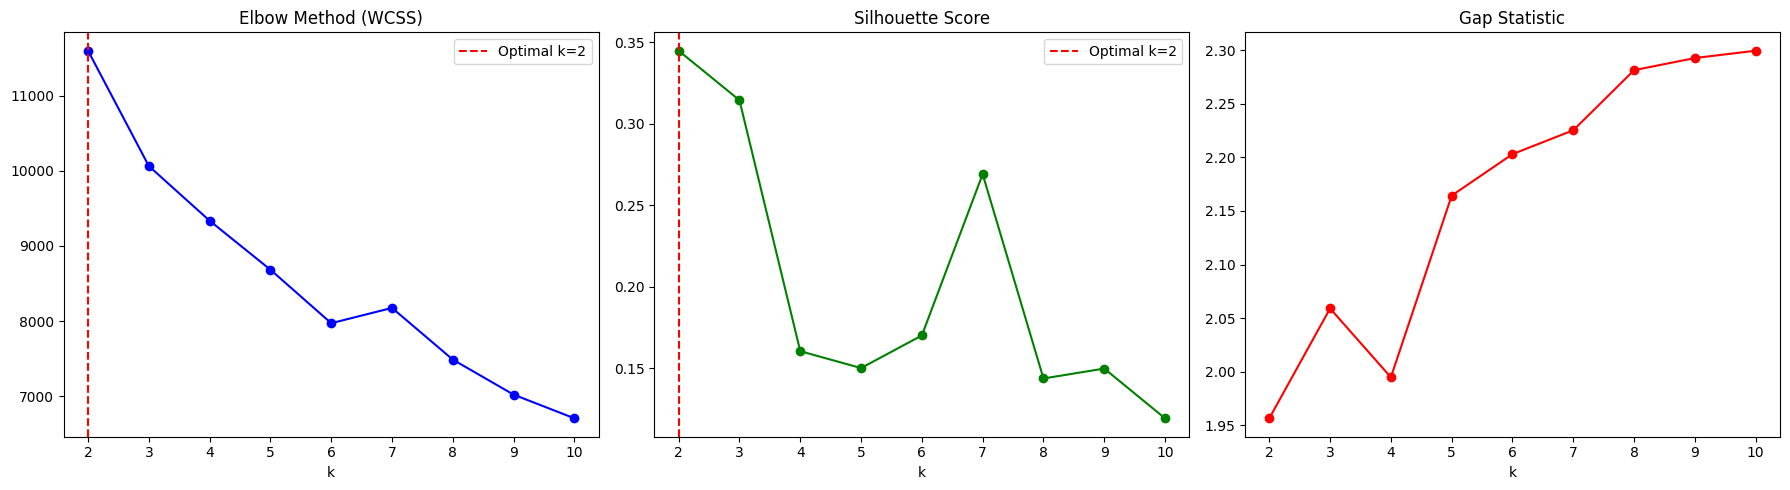


Comparing Initialization at k=2...
Random Init Iterations: 10
KMeans++ Init Iterations: 12


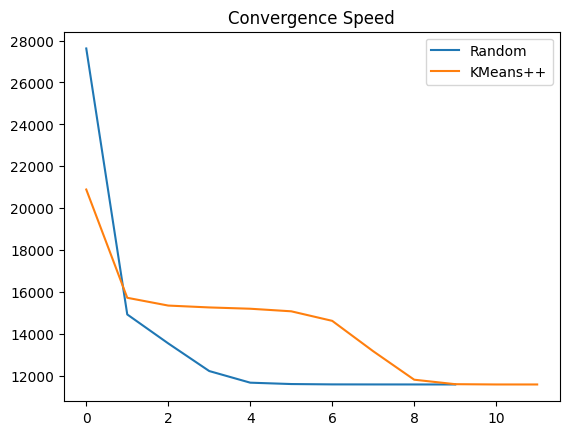


Final Results (k=2):
ARI: 0.6536
NMI: 0.5324
Purity: 0.9051
------------------------------
Silhouette: 0.3434
Davies-Bouldin: 1.3205
Calinski-Harabasz: 267.6917

Confusion Matrix:
[[339  18]
 [ 36 176]]


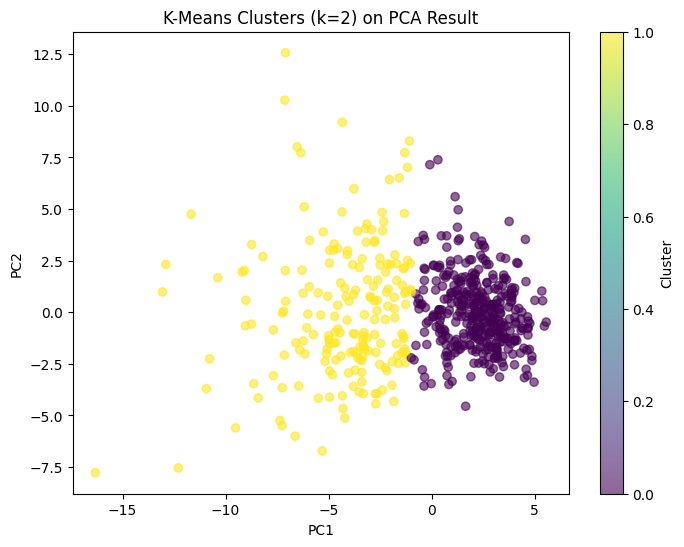

In [15]:
# --- 1. OPTIMAL K ANALYSIS (Elbow, Silhouette, Gap) ---
k_values = range(2, 11)
wcss_list = []
sil_scores = []
ch_scores = []
db_scores = []
gap_values = []

# Define Gap Statistic Function
def gap_statistic(X, k, B=5):
    # 1. Fit on Real Data
    model = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
    model.fit(X)
    log_wcss_real = np.log(model.inertia_)

    # 2. Fit on Reference Data (Random Uniform)
    log_wcss_rands = []
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    
    for _ in range(B):
        X_rand = np.random.uniform(mins, maxs, size=X.shape)
        km_rand = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
        km_rand.fit(X_rand)
        log_wcss_rands.append(np.log(km_rand.inertia_))

    # Gap = E[log(W_ref)] - log(W_real)
    return np.mean(log_wcss_rands) - log_wcss_real

print("Running Analysis for k= from 2 to 10")
for k in k_values:
    # Train
    model = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
    model.fit(X_scaled)
    labels = model.labels_
    
    # Store Metrics
    wcss_list.append(model.inertia_)
    sil_scores.append(silhouette_score_scratch(X_scaled, labels))
    db_scores.append(davies_bouldin_score_scratch(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score_scratch(X_scaled, labels))
    
    # Calculate Gap (This might be slow, so B=5 is good for testing)
    gap = gap_statistic(X_scaled, k, B=5)
    gap_values.append(gap)

# --- 2. PLOT RESULTS ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow
axes[0].plot(k_values, wcss_list, 'bo-')
axes[0].axvline(x=2, color='r', linestyle='--', label='Optimal k=2') # <--- ADDED MARKER
axes[0].set_title("Elbow Method (WCSS)")
axes[0].set_xlabel("k")
axes[0].legend()

# Silhouette
axes[1].plot(k_values, sil_scores, 'go-')
axes[1].axvline(x=2, color='r', linestyle='--', label='Optimal k=2') # <--- ADDED MARKER
axes[1].set_title("Silhouette Score")
axes[1].set_xlabel("k")
axes[1].legend()

# Gap Statistic
axes[2].plot(k_values, gap_values, 'ro-')
axes[2].set_title("Gap Statistic")
axes[2].set_xlabel("k")

plt.tight_layout()
plt.show()



# --- 3. CONVERGENCE COMPARISON (at Fixed k=2) ---
optimal_k = 2 
print(f"\nComparing Initialization at k={optimal_k}...")

# Random
km_random = KMeans_Scratch(n_clusters=optimal_k, init_method="random")
km_random.fit(X_scaled)

# K-Means++
km_kpp = KMeans_Scratch(n_clusters=optimal_k, init_method="kmeans++")
km_kpp.fit(X_scaled)

print(f"Random Init Iterations: {len(km_random.inertia_history)}")
print(f"KMeans++ Init Iterations: {len(km_kpp.inertia_history)}")

plt.plot(km_random.inertia_history, label="Random")
plt.plot(km_kpp.inertia_history, label="KMeans++")
plt.title("Convergence Speed")
plt.legend()
plt.show()

#  EXTERNAL METRICS & VISUALIZATION (Best Model) ---
# Use the best model (KMeans++)
best_labels = km_kpp.labels_

# Calculate External Metrics
ari = adjusted_rand_index_scratch(y, best_labels)
nmi = normalized_mutual_information_scratch(y, best_labels)
purity = purity_score_scratch(y, best_labels)



final_sil = silhouette_score_scratch(X_scaled, best_labels)
final_db = davies_bouldin_score_scratch(X_scaled, best_labels)
final_ch = calinski_harabasz_score_scratch(X_scaled, best_labels)

print(f"\nFinal Results (k={optimal_k}):")
print(f"ARI: {ari:.4f}")
print(f"NMI: {nmi:.4f}")
print(f"Purity: {purity:.4f}")
print("-" * 30)
print(f"Silhouette: {final_sil:.4f}")
print(f"Davies-Bouldin: {final_db:.4f}")
print(f"Calinski-Harabasz: {final_ch:.4f}") 

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, best_labels))


# 2D Projection
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled) 

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=best_labels, cmap='viridis', alpha=0.6)
plt.title(f"K-Means Clusters (k={optimal_k}) on PCA Result")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

## EXP 2 

=== Running Experiment 2: GMM Analysis ===
1. Finding Optimal Components (k=2..10)...


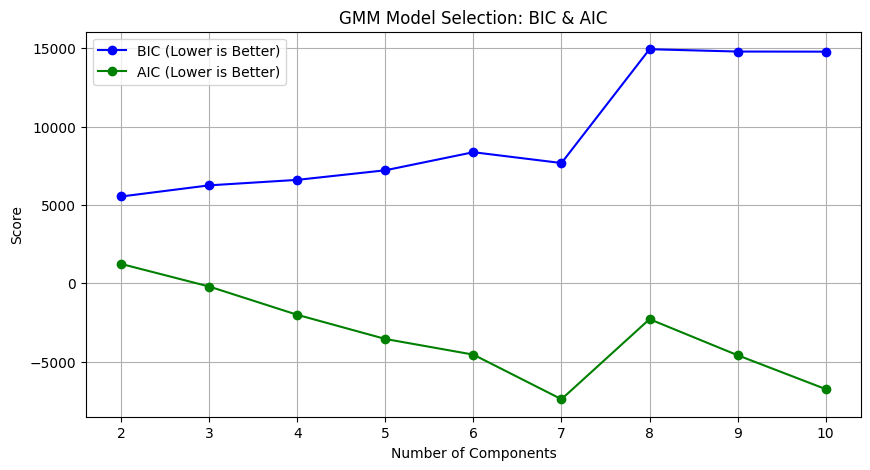

Optimal k based on BIC: 2

2. Comparing Covariance Types at k=2...
  Covariance Type  Log-Likelihood  Iterations  Time (s)
0            full      371.595349          54  0.081435
1            tied    -3957.119556          50  0.074008
2        diagonal   -18554.589694          17  0.004007
3       spherical   -20080.821240          23  0.004530


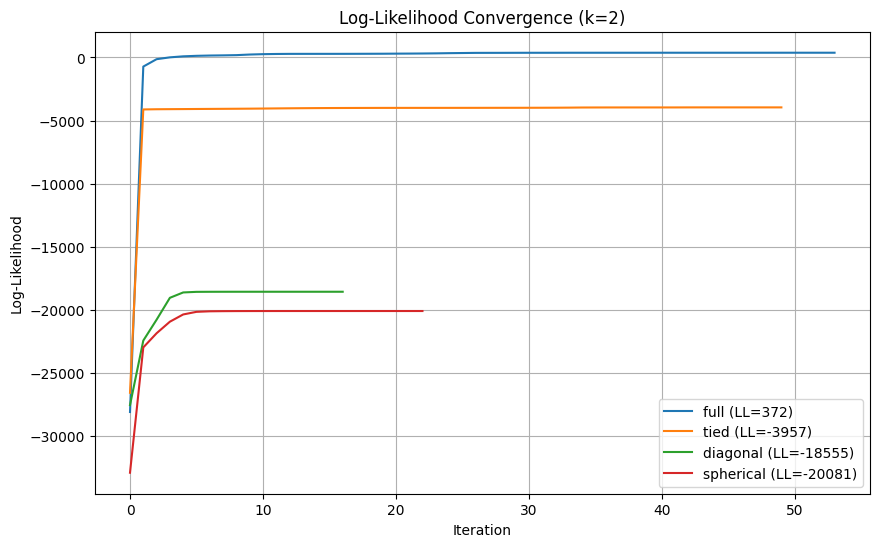


3. Evaluating Best GMM Model (full covariance)...
Final GMM Purity: 0.9033
Final GMM ARI:    0.6495
Final GMM NMI:    0.5407

Confusion Matrix:
[[318  39]
 [ 16 196]]

Internal Metrics for Best GMM (k=2):
Silhouette Score:      0.2932
Davies-Bouldin Index:  1.4632
Calinski-Harabasz:     221.0040
WCSS (Inertia):        12282.5410


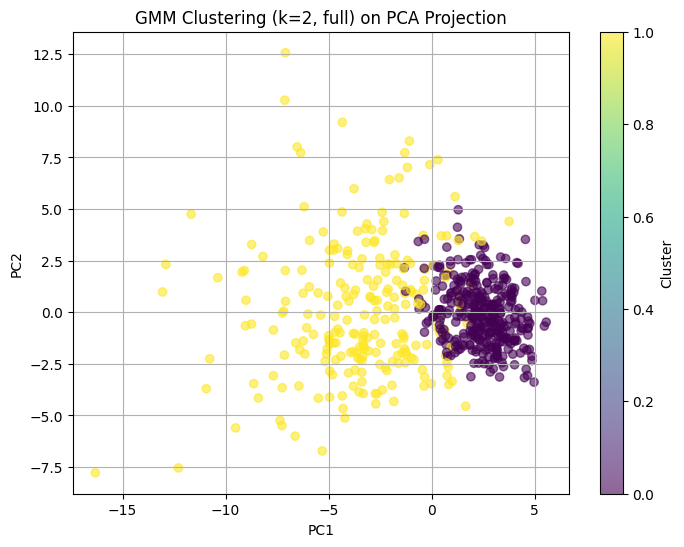

In [16]:
import time

from src.clustering.gmm import GMM_Scratch
from src.metrics.internal import calculate_gmm_metrics
from src.metrics.external import purity_score_scratch, adjusted_rand_index_scratch
from src.metrics.internal import calculate_wcss

# ==========================================
# PART 1: OPTIMAL COMPONENTS (BIC & AIC)
# ==========================================
print("=== Running Experiment 2: GMM Analysis ===")
print("1. Finding Optimal Components (k=2..10)...")

n_components_range = range(2, 11)
bic_scores = []
aic_scores = []
log_likelihoods = []

# We use 'full' covariance for finding k as it's the most flexible
for k in n_components_range:
    gmm = GMM_Scratch(n_components=k, max_iter=100, tol=1e-4, covariance_type='full')
    gmm.fit(X_scaled)
    
    final_ll = gmm.log_likelihood_history[-1]
    
    metrics = calculate_gmm_metrics(X_scaled, final_ll, k, 'full')
    
    bic_scores.append(metrics['BIC'])
    aic_scores.append(metrics['AIC'])
    log_likelihoods.append(final_ll)

# Plot BIC and AIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_scores, 'bo-', label='BIC (Lower is Better)')
plt.plot(n_components_range, aic_scores, 'go-', label='AIC (Lower is Better)')
plt.title('GMM Model Selection: BIC & AIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Determine optimal k (lowest BIC)
optimal_k_gmm = n_components_range[np.argmin(bic_scores)]
print(f"Optimal k based on BIC: {optimal_k_gmm}")

# ==========================================
# PART 2: COMPARE COVARIANCE TYPES
# ==========================================
# We will use k=2 (Ground Truth) or optimal_k_gmm for fair comparison
cov_k = 2 
print(f"\n2. Comparing Covariance Types at k={cov_k}...")

cov_types = ['full', 'tied', 'diagonal', 'spherical']
results_list = []
best_gmm_model = None
best_ll = -np.inf

plt.figure(figsize=(10, 6))

for cov_type in cov_types:
    start_time = time.time()
    
    gmm = GMM_Scratch(n_components=cov_k, max_iter=200, tol=1e-4, covariance_type=cov_type)
    gmm.fit(X_scaled)
    
    elapsed = time.time() - start_time
    final_ll = gmm.log_likelihood_history[-1]
    iters = len(gmm.log_likelihood_history)
    
    # Store Best Model
    if final_ll > best_ll:
        best_ll = final_ll
        best_gmm_model = gmm
        best_cov_type = cov_type
        
    # Plot Convergence
    plt.plot(gmm.log_likelihood_history, label=f'{cov_type} (LL={final_ll:.0f})')
    
    results_list.append({
        'Covariance Type': cov_type,
        'Log-Likelihood': final_ll,
        'Iterations': iters,
        'Time (s)': elapsed
    })

# Show Comparison Table
results_df = pd.DataFrame(results_list)
print(results_df)

# Show Convergence Plot
plt.title(f'Log-Likelihood Convergence (k={cov_k})')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()

# ==========================================
# PART 3: FINAL METRICS (BEST GMM)
# ==========================================
print(f"\n3. Evaluating Best GMM Model ({best_cov_type} covariance)...")

# Predict labels
y_pred_gmm = best_gmm_model.predict(X_scaled)

# External Validation
purity = purity_score_scratch(y, y_pred_gmm)
ari = adjusted_rand_index_scratch(y, y_pred_gmm)
nmi = normalized_mutual_information_scratch(y, y_pred_gmm)

print(f"Final GMM Purity: {purity:.4f}")
print(f"Final GMM ARI:    {ari:.4f}")
print(f"Final GMM NMI:    {nmi:.4f}")

# Optional: Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_gmm))






# ... (Previous Experiment 2 code ending at Confusion Matrix) ...

# ==========================================
# PART 4: MISSING METRICS & VISUALIZATION
# ==========================================
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch
)
from src.dimensionality_reduction.pca import PCA # For visualization only

# 1. Calculate Generic Internal Metrics for GMM
# Note: We use the labels predicted by GMM
sil_gmm = silhouette_score_scratch(X_scaled, y_pred_gmm)
db_gmm = davies_bouldin_score_scratch(X_scaled, y_pred_gmm)
ch_gmm = calinski_harabasz_score_scratch(X_scaled, y_pred_gmm)
wcss_gmm = calculate_wcss(X_scaled, y_pred_gmm, best_gmm_model.means)

print(f"\nInternal Metrics for Best GMM (k={cov_k}):")
print(f"Silhouette Score:      {sil_gmm:.4f}")
print(f"Davies-Bouldin Index:  {db_gmm:.4f}")
print(f"Calinski-Harabasz:     {ch_gmm:.4f}")
print(f"WCSS (Inertia):        {wcss_gmm:.4f}")

# 2. GMM Cluster Visualization (2D Projection)
# We use PCA just to project the 30 features down to 2 so we can see the clusters
pca_viz = PCA(n_components=2)
X_2d_gmm = pca_viz.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d_gmm[:, 0], X_2d_gmm[:, 1], c=y_pred_gmm, cmap='viridis', alpha=0.6)
plt.title(f'GMM Clustering (k={cov_k}, {best_cov_type}) on PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## EXP 3


Running PCA + KMeans with 2 components


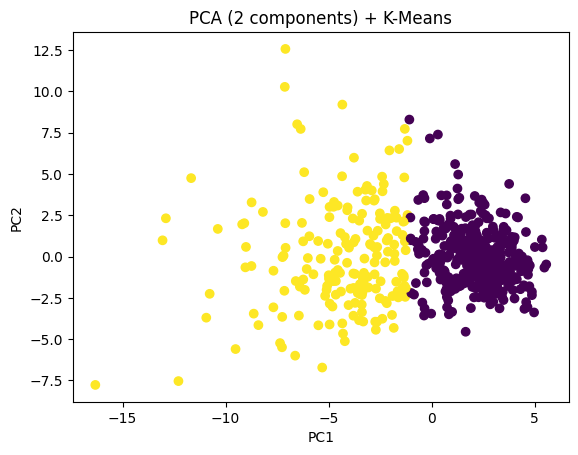


Running PCA + KMeans with 5 components


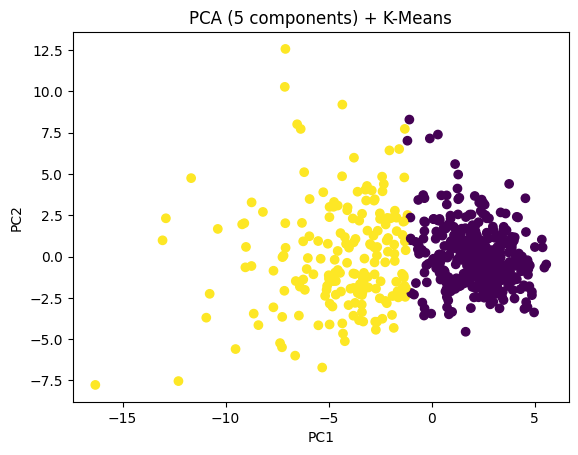


Running PCA + KMeans with 10 components


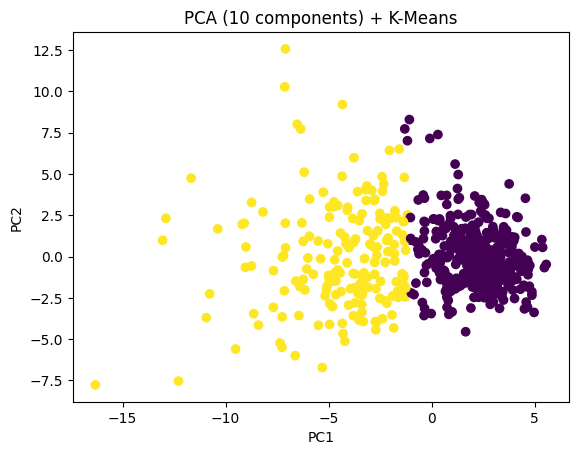


Running PCA + KMeans with 15 components


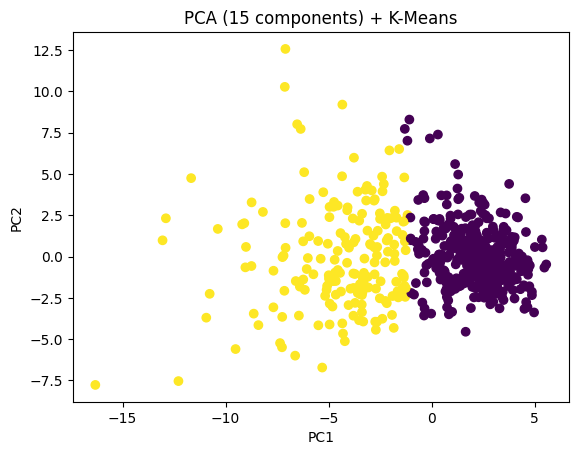


Running PCA + KMeans with 20 components


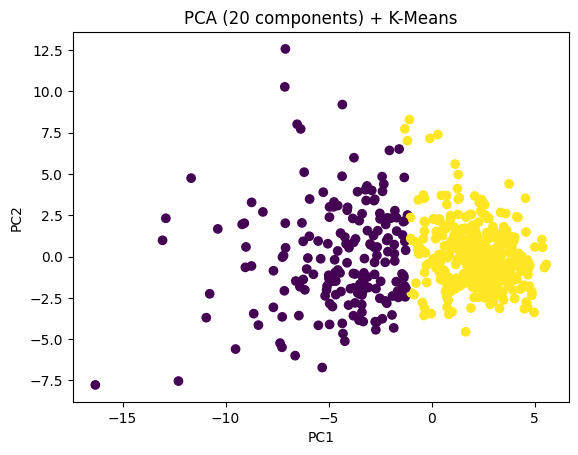

   PCA_components  Reconstruction_MSE  Explained_Variance  Silhouette  \
0               2            0.367568            0.632432    0.508091   
1               5            0.152657            0.847343    0.393223   
2              10            0.048431            0.951569    0.357745   
3              15            0.013512            0.986488    0.348078   
4              20            0.004428            0.995572    0.345859   

   Davies_Bouldin  Calinski_Harabasz          WCSS       ARI       NMI  \
0        0.844135         580.784480   5332.982035  0.664963  0.547404   
1        1.140900         345.069305   8991.825172  0.670721  0.554612   
2        1.256692         288.091573  10770.705566  0.676505  0.562021   
3        1.294817         273.070876  11365.603779  0.676505  0.562021   
4        1.304328         269.429253  11520.201082  0.676505  0.562021   

     Purity  
0  0.908612  
1  0.910369  
2  0.912127  
3  0.912127  
4  0.912127  


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------
# SETTINGS
# ----------------------------------
pca_dims = [2, 5, 10, 15, 20]
k_opt = 2   # choose from Experiment 1 (usually 2 for cancer)

results = []

# ----------------------------------
# LOOP OVER PCA DIMENSIONS
# ----------------------------------
for n_comp in pca_dims:
    print(f"\nRunning PCA + KMeans with {n_comp} components")

    # -------- PCA --------
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_scaled)

    # PCA quality
    recon_mse = pca.mean_squared_reconstruction_error(X_scaled)
    explained_variance = np.sum(pca.get_explained_variance())

    # -------- K-MEANS --------
    kmeans = KMeans_Scratch(
        n_clusters=k_opt,
        init_method="kmeans++"
    )
    kmeans.fit(X_pca)
    labels = kmeans.labels_

    # -------- INTERNAL METRICS --------
    sil = silhouette_score_scratch(X_pca, labels)
    db  = davies_bouldin_score_scratch(X_pca, labels)
    ch  = calinski_harabasz_score_scratch(X_pca, labels)
    wcss = kmeans.inertia_

    # -------- EXTERNAL METRICS (EVALUATION ONLY) --------
    ari = adjusted_rand_index_scratch(y, labels)
    nmi = normalized_mutual_information_scratch(y, labels)
    purity = purity_score_scratch(y, labels)

    # -------- SAVE RESULTS --------
    results.append({
        "PCA_components": n_comp,
        "Reconstruction_MSE": recon_mse,
        "Explained_Variance": explained_variance,
        "Silhouette": sil,
        "Davies_Bouldin": db,
        "Calinski_Harabasz": ch,
        "WCSS": wcss,
        "ARI": ari,
        "NMI": nmi,
        "Purity": purity
    })

    # -------- 2D VISUALIZATION (REQUIRED) --------
    X_2d = X_pca[:, :2]

    plt.figure()
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap="viridis")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA ({n_comp} components) + K-Means")
    plt.show()

# ----------------------------------
# RESULTS TABLE
# ----------------------------------
results_df = pd.DataFrame(results)
print(results_df)


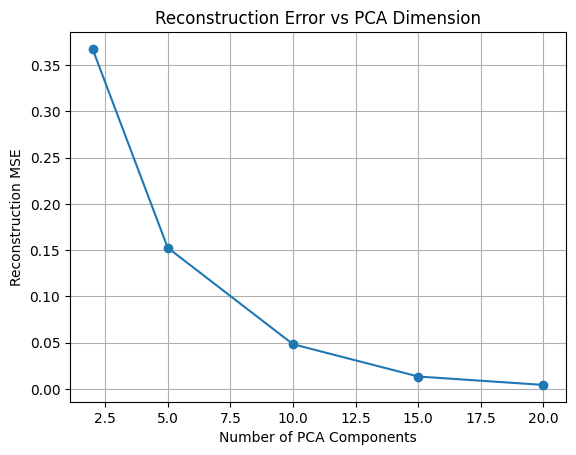

In [18]:
plt.figure()
plt.plot(
    results_df["PCA_components"],
    results_df["Reconstruction_MSE"],
    marker="o"
)
plt.xlabel("Number of PCA Components")
plt.ylabel("Reconstruction MSE")
plt.title("Reconstruction Error vs PCA Dimension")
plt.grid(True)
plt.show()


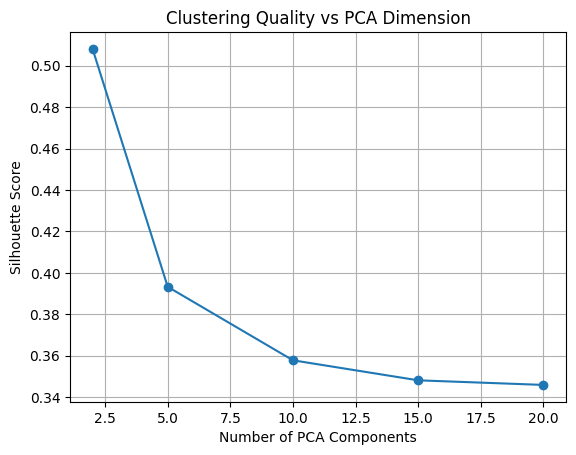

In [19]:
plt.figure()
plt.plot(
    results_df["PCA_components"],
    results_df["Silhouette"],
    marker="o"
)
plt.xlabel("Number of PCA Components")
plt.ylabel("Silhouette Score")
plt.title("Clustering Quality vs PCA Dimension")
plt.grid(True)
plt.show()


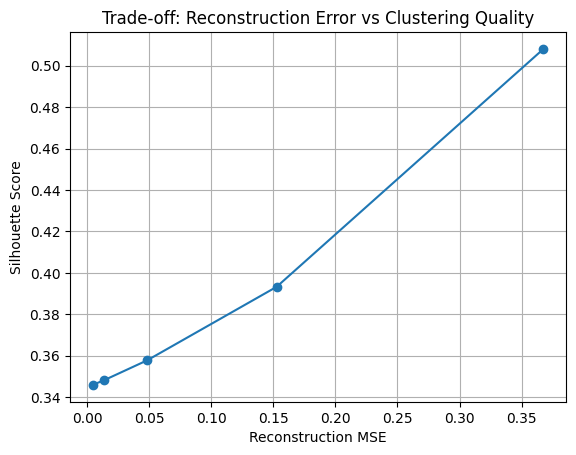

In [20]:
plt.figure()
plt.plot(
    results_df["Reconstruction_MSE"],
    results_df["Silhouette"],
    marker="o"
)
plt.xlabel("Reconstruction MSE")
plt.ylabel("Silhouette Score")
plt.title("Trade-off: Reconstruction Error vs Clustering Quality")
plt.grid(True)
plt.show()



Running Experiment 3: PCA (2 components) + KMeans


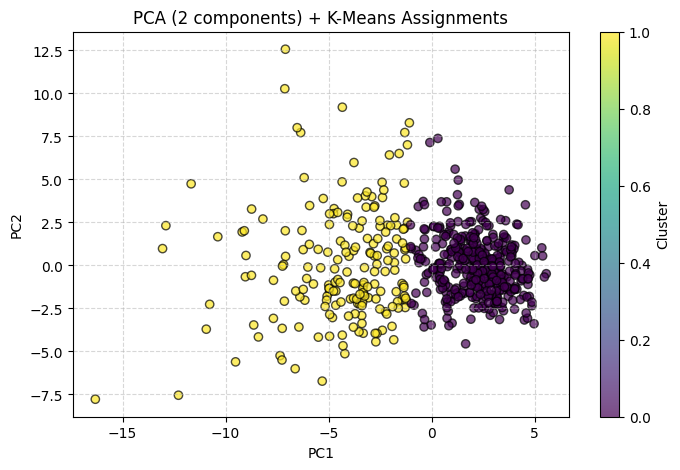


Running Experiment 3: PCA (5 components) + KMeans


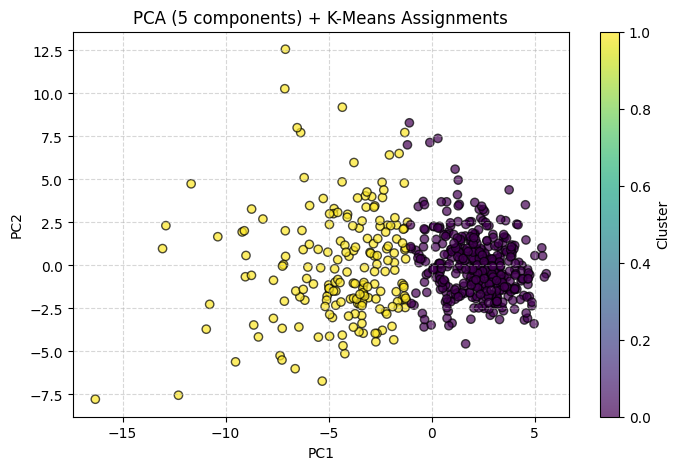


Running Experiment 3: PCA (10 components) + KMeans


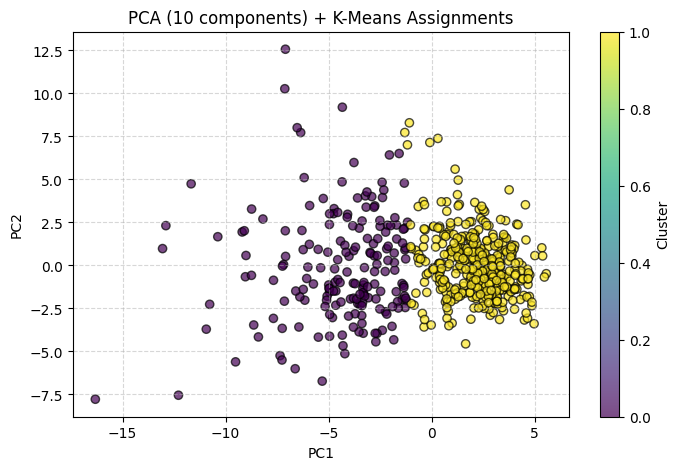


Running Experiment 3: PCA (15 components) + KMeans


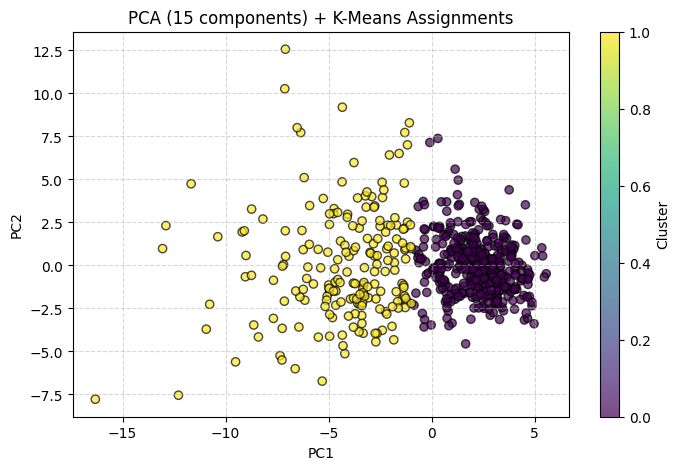


Running Experiment 3: PCA (20 components) + KMeans


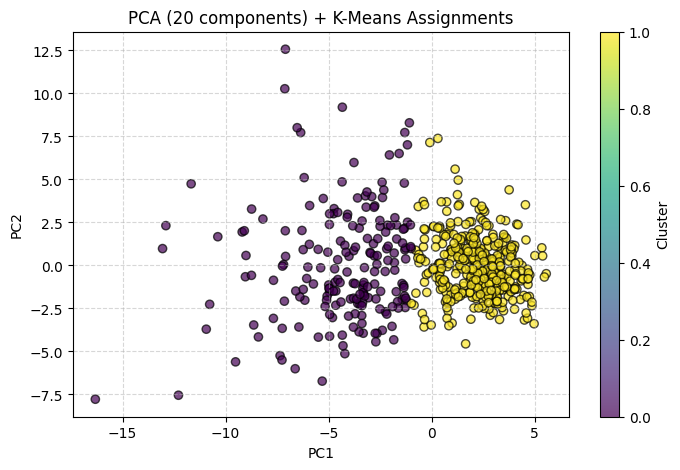

In [21]:
# =========================================================
# 3. EXPERIMENT 3: K-MEANS AFTER PCA [cite: 52]
# =========================================================
pca_dims = [2, 5, 10, 15, 20] # [cite: 53]
k_opt = 2  # Based on Breast Cancer target labels
results_exp3 = []

# Ensure data is standardized before PCA 
# Note: X_scaled and y should be defined before running this block

for n_comp in pca_dims:
    print(f"\nRunning Experiment 3: PCA ({n_comp} components) + KMeans")

    # --- Step A: PCA Reduction ---
    pca_model = PCA(n_components=n_comp) 
    X_pca = pca_model.fit_transform(X_scaled)
    recon_mse = pca_model.mean_squared_reconstruction_error(X_scaled) 
    total_var = np.sum(pca_model.get_explained_variance()) 

    # --- Step B: K-Means Clustering ---
    kmeans = KMeans_Scratch(n_clusters=k_opt, init_method="kmeans++")
    kmeans.fit(X_pca)
    labels = kmeans.labels_

    # --- Step C: Evaluation (Using scratch implementations) ---
    # Internal metrics [cite: 76-81]
    sil = silhouette_score_scratch(X_pca, labels) 
    db  = davies_bouldin_score_scratch(X_pca, labels) 
    ch  = calinski_harabasz_score_scratch(X_pca, labels) 
    wcss = kmeans.inertia_

    # External metrics (labels used for evaluation only) [cite: 83-87]
    ari = adjusted_rand_index_scratch(y, labels) 
    nmi = normalized_mutual_information_scratch(y, labels) 
    purity = purity_score_scratch(y, labels) 

    # --- Step D: Results & Visualization ---
    results_exp3.append({
        "PCA_Components": n_comp,
        "Reconstruction_MSE": recon_mse,
        "Explained_Var_Ratio": total_var,
        "Silhouette": sil,
        "Davies_Bouldin": db,
        "Calinski_Harabasz": ch,
        "WCSS": wcss,
        "ARI": ari,
        "NMI": nmi,
        "Purity": purity
    })

    # Required 2D Visualization (using first 2 dimensions) 
    plt.figure(figsize=(8, 5))
    X_vis = X_pca[:, :2] 
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
    plt.title(f"PCA ({n_comp} components) + K-Means Assignments")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.colorbar(label='Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


--- Final Comparison Table (Experiment 3) ---
   PCA_Components  Reconstruction_MSE  Explained_Var_Ratio  Silhouette  \
0               2            0.367568             0.632432    0.508469   
1               5            0.152657             0.847343    0.393223   
2              10            0.048431             0.951569    0.357745   
3              15            0.013512             0.986488    0.346083   
4              20            0.004428             0.995572    0.344517   

   Davies_Bouldin  Calinski_Harabasz          WCSS       ARI       NMI  \
0        0.846740         580.876272   5332.555574  0.659231  0.540381   
1        1.140900         345.069305   8991.825172  0.670721  0.554612   
2        1.256692         288.091573  10770.705566  0.676505  0.562021   
3        1.306472         273.073339  11365.570468  0.659427  0.538031   
4        1.315558         269.443761  11520.001257  0.653625  0.532408   

     Purity  
0  0.906854  
1  0.910369  
2  0.912127  
3  0.90

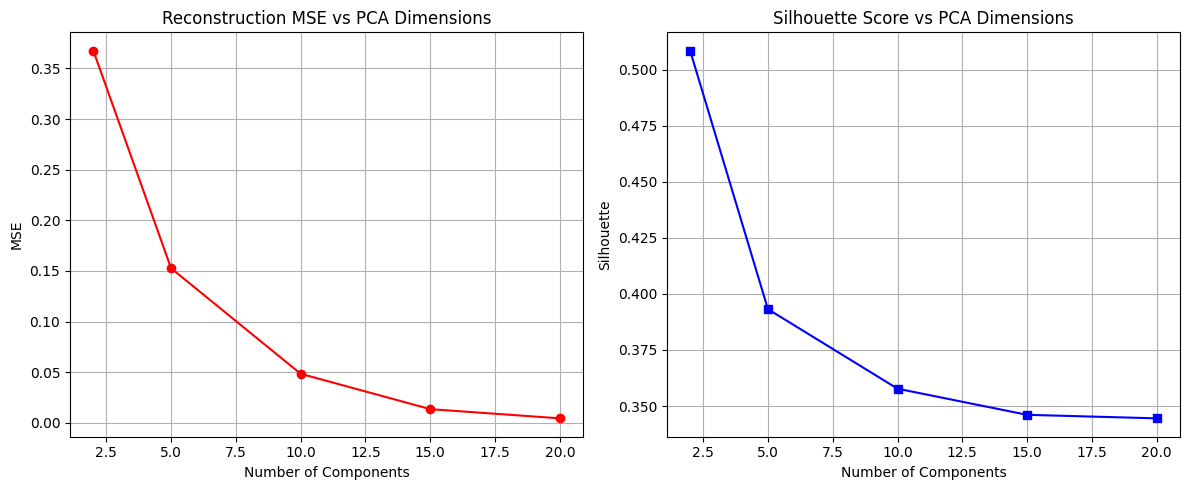

In [22]:
df_exp3 = pd.DataFrame(results_exp3)
print("\n--- Final Comparison Table (Experiment 3) ---")
print(df_exp3)

# Analysis of Trade-off: Dimensionality vs Performance [cite: 54, 55]
plt.figure(figsize=(12, 5))

# Plot 1: Reconstruction Error
plt.subplot(1, 2, 1)
plt.plot(df_exp3['PCA_Components'], df_exp3['Reconstruction_MSE'], marker='o', color='red')
plt.title("Reconstruction MSE vs PCA Dimensions")
plt.xlabel("Number of Components")
plt.ylabel("MSE")
plt.grid(True)

# Plot 2: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(df_exp3['PCA_Components'], df_exp3['Silhouette'], marker='s', color='blue')
plt.title("Silhouette Score vs PCA Dimensions")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette")
plt.grid(True)

plt.tight_layout()
plt.show()

#####  adding more dimensions introduces "noise" or spreads out the data points, making the cluster boundaries less distinct.

In [23]:
def relu(z): return np.maximum(0, z)
def relu_deriv(z): return (z > 0).astype(float)  # 1 where z > 0, else 0 

def sigmoid(z): return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
def sigmoid_deriv(z): 
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z): return np.tanh(z)
def tanh_deriv(z): return 1 - np.tanh(z)**2


def identity(z): return z
def identity_deriv(z): return np.ones_like(z)

## Experiment 4: GMM after PCA

=== Running Experiment 4: GMM after PCA ===


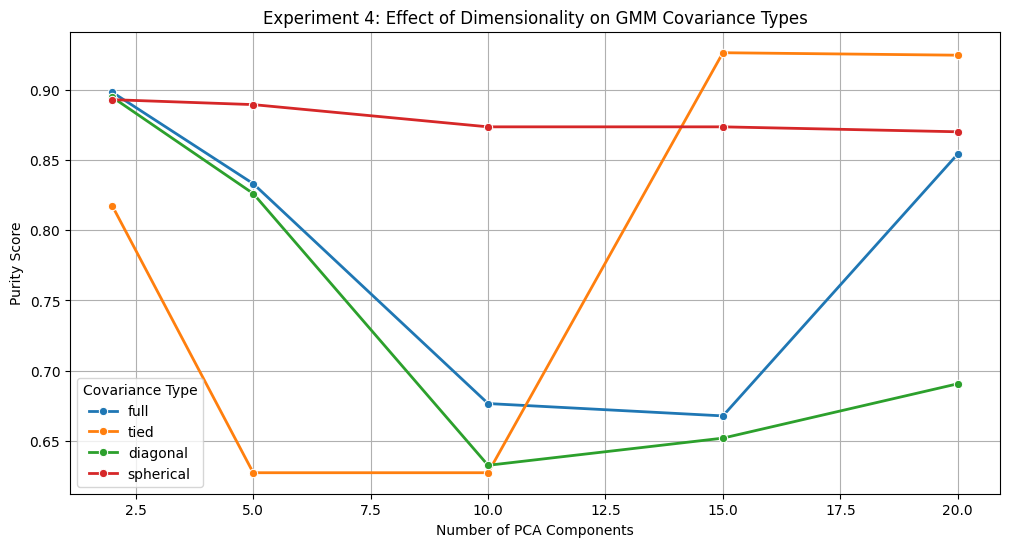


Purity Scores by Dimension and Covariance Type:
n_components           2         5         10        15        20
Covariance Type                                                  
diagonal         0.894552  0.826011  0.632689  0.652021  0.690685
full             0.898067  0.833040  0.676626  0.667838  0.854130
spherical        0.892794  0.889279  0.873462  0.873462  0.869947
tied             0.817223  0.627417  0.627417  0.926186  0.924429

=== Best Configuration: PCA=15, Covariance=tied ===
n_components                   15
Covariance Type              tied
Purity                   0.926186
ARI                      0.723246
NMI                      0.668205
Silhouette               0.335191
Davies-Bouldin           1.306525
Calinski-Harabasz       246.30207
WCSS                 11740.643153
Log-Likelihood      -10723.766716
BIC                  22405.459378
AIC                  21749.533433
Name: 13, dtype: object

Confusion Matrix for Best Model:
[[357   0]
 [ 42 170]]


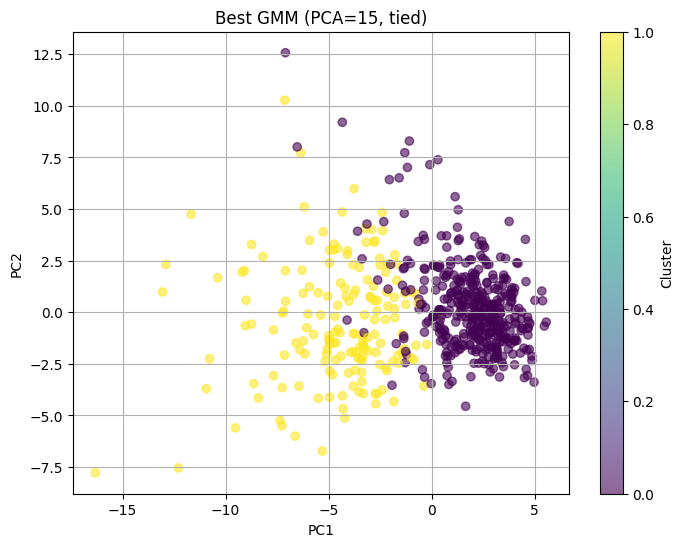

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Imports
from src.dimensionality_reduction.pca import PCA
from src.clustering.gmm import GMM_Scratch
from src.metrics.external import (
    purity_score_scratch, 
    adjusted_rand_index_scratch, 
    normalized_mutual_information_scratch
)
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch,
    calculate_gmm_metrics,
    calculate_wcss
)

print("=== Running Experiment 4: GMM after PCA ===")

# Settings
n_components_list = [2, 5, 10, 15, 20]
cov_types = ['full', 'tied', 'diagonal', 'spherical']
results_exp4 = []

gmm_k = 2
best_exp4_config = None
best_exp4_purity = -1
best_model_instance = None
best_X_reduced = None

# --- Main Experiment Loop ---
for n_comp in n_components_list:
    # 1. Apply PCA
    pca = PCA(n_components=n_comp)
    X_reduced = pca.fit_transform(X_scaled)
    
    for cov_type in cov_types:
        # Train GMM
        gmm = GMM_Scratch(n_components=gmm_k, max_iter=100, tol=1e-4, covariance_type=cov_type)
        gmm.fit(X_reduced)
        
        # Predict
        y_pred = gmm.predict(X_reduced)
        final_ll = gmm.log_likelihood_history[-1]
        
        # --- CALCULATE METRICS ---
        # 1. External
        purity = purity_score_scratch(y, y_pred)
        ari = adjusted_rand_index_scratch(y, y_pred)
        nmi = normalized_mutual_information_scratch(y, y_pred) # <--- ADDED
        
        # 2. Internal
        sil = silhouette_score_scratch(X_reduced, y_pred)
        db = davies_bouldin_score_scratch(X_reduced, y_pred)
        ch = calinski_harabasz_score_scratch(X_reduced, y_pred)
        
        # 3. GMM Specific (BIC/AIC) & WCSS
        gmm_metrics = calculate_gmm_metrics(X_reduced, final_ll, gmm_k, cov_type)
        wcss = calculate_wcss(X_reduced, y_pred, gmm.means)
        
        # Save Best Model Logic
        if purity > best_exp4_purity:
            best_exp4_purity = purity
            best_exp4_config = (n_comp, cov_type)
            best_model_instance = gmm # Save for confusion matrix later
            best_X_reduced = X_reduced # Save for plotting
            best_labels = y_pred

        results_exp4.append({
            'n_components': n_comp,
            'Covariance Type': cov_type,
            'Purity': purity,
            'ARI': ari,
            'NMI': nmi,
            'Silhouette': sil,
            'Davies-Bouldin': db,
            'Calinski-Harabasz': ch,
            'WCSS': wcss,
            'Log-Likelihood': final_ll,
            'BIC': gmm_metrics['BIC'],
            'AIC': gmm_metrics['AIC']
        })

# --- ANALYSIS & VISUALIZATION ---
df_exp4 = pd.DataFrame(results_exp4)

# 1. Line Plot (Experiment 4 Specific Goal)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_exp4, x='n_components', y='Purity', hue='Covariance Type', marker='o', linewidth=2)
plt.title('Experiment 4: Effect of Dimensionality on GMM Covariance Types')
plt.xlabel('Number of PCA Components')
plt.ylabel('Purity Score')
plt.grid(True)
plt.legend(title='Covariance Type')
plt.show()

# 2. Pivot Table
print("\nPurity Scores by Dimension and Covariance Type:")
pivot_table = df_exp4.pivot(index='Covariance Type', columns='n_components', values='Purity')
print(pivot_table)

# --- BEST MODEL REPORTING (Required "For each experiment") ---
print(f"\n=== Best Configuration: PCA={best_exp4_config[0]}, Covariance={best_exp4_config[1]} ===")
best_row = df_exp4.loc[(df_exp4['n_components'] == best_exp4_config[0]) & 
                       (df_exp4['Covariance Type'] == best_exp4_config[1])].iloc[0]
print(best_row)

# 3. Confusion Matrix
print("\nConfusion Matrix for Best Model:")
print(confusion_matrix(y, best_labels))

# 4. 2D Projection of Best Result
# If dimensions > 2, project to 2D for visualization
if best_exp4_config[0] > 2:
    pca_viz = PCA(n_components=2)
    X_viz = pca_viz.fit_transform(best_X_reduced)
else:
    X_viz = best_X_reduced

plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.title(f'Best GMM (PCA={best_exp4_config[0]}, {best_exp4_config[1]})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### EXP 5

In [25]:
from src.dimensionality_reduction.autoencoder import AutoEncoder


--- Running Experiment 5: Autoencoder (Bottleneck=2) + KMeans ---


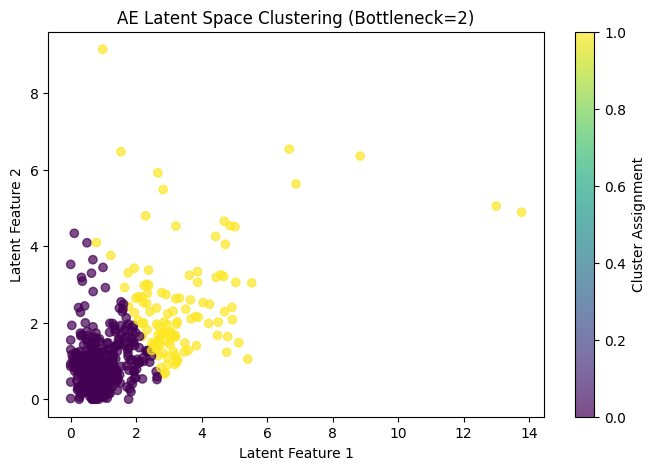


--- Running Experiment 5: Autoencoder (Bottleneck=5) + KMeans ---


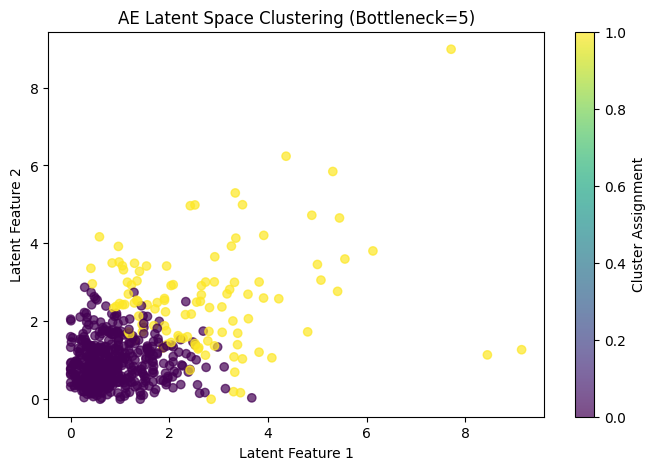


--- Running Experiment 5: Autoencoder (Bottleneck=10) + KMeans ---


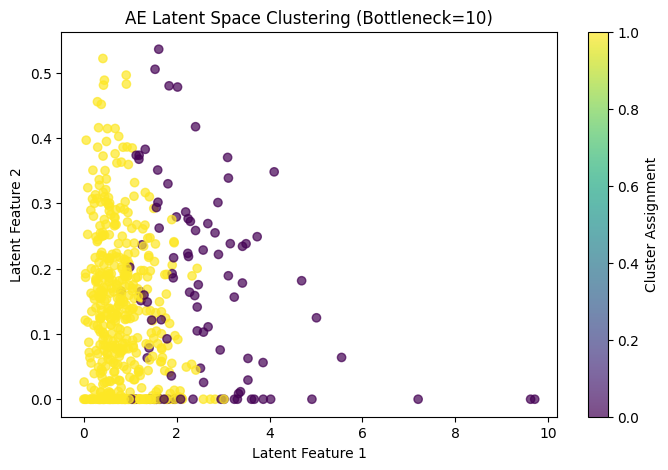


--- Running Experiment 5: Autoencoder (Bottleneck=15) + KMeans ---


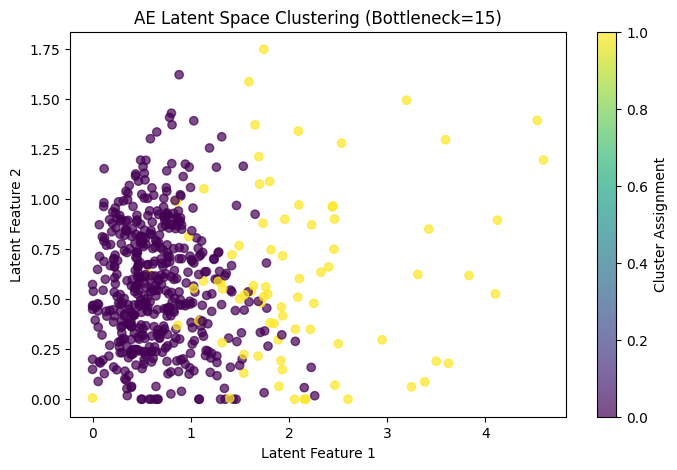


--- Running Experiment 5: Autoencoder (Bottleneck=20) + KMeans ---


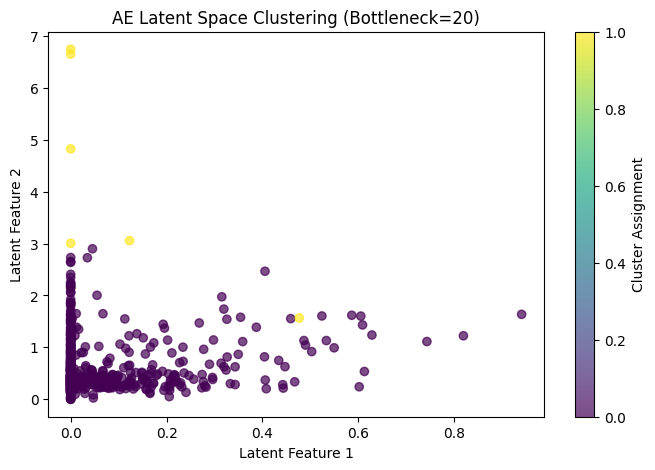


--- Experiment 5 Summary Table ---
   Bottleneck_Dim  Reconstruction_MSE  Silhouette       ARI    Purity
0               2            0.310492    0.586415  0.421599  0.829525
1               5            0.141077    0.441888  0.027994  0.627417
2              10            0.107663    0.473778  0.097695  0.676626
3              15            0.091963    0.449950  0.109545  0.687170
4              20            0.100535    0.723943  0.013156  0.636204


In [26]:
# ----------------------------------
# SETTINGS & HYPERPARAMETERS [cite: 116]
# ----------------------------------
bottleneck_dims = [2, 5, 10, 15, 20]
k_opt = 2  # Based on Experiment 1 [cite: 46]
input_dim = X_scaled.shape[1]
results_exp5 = []

# ----------------------------------
# LOOP OVER BOTTLENECK DIMENSIONS 
# ----------------------------------
for b_dim in bottleneck_dims:
    print(f"\n--- Running Experiment 5: Autoencoder (Bottleneck={b_dim}) + KMeans ---")

    # 1. Architecture: Input -> 64 -> 32 -> Bottleneck -> 32 -> 64 -> Input [cite: 18, 19]
    # This ensures hidden layers (32, 64) are always larger than the bottleneck (max 20)
    layers = [input_dim, 64, 32, b_dim, 32, 64, input_dim]
    
    # Required: Multiple activation functions (ReLU, sigmoid, tanh) [cite: 20]
    # Change the last layer from sigmoid to identity 
    activations = [
    (tanh, tanh_deriv),     # Layer 1
    (relu, relu_deriv),     # Layer 2
    (relu, relu_deriv),     # Layer 3 (Bottleneck)
    (relu, relu_deriv),     # Layer 4
    (tanh, tanh_deriv),     # Layer 5
    (identity, identity_deriv) # Final Output Layer
]

    # 2. Train Autoencoder [cite: 21, 22, 23, 24]
    # Includes backpropagation, mini-batch GD, L2 regularization, and LR scheduling
    ae = AutoEncoder(layers, activations, lr=0.01, l2=0.001)
    ae.train(X_scaled, epochs=100, batch_size=32, step_size=30, gamma=0.7)

    # 3. Extract Latent Features (The output of the bottleneck layer)
    # We pass the data through the first 3 layers (the Encoder part)
    A = X_scaled
    for i in range(3): 
        Z = A @ ae.W[i] + ae.b[i]
        A = ae.activations[i][0](Z)
    X_latent = A

    # 4. Clustering using K-Means++ [cite: 26, 59]
    kmeans = KMeans_Scratch(n_clusters=k_opt, init_method='kmeans++')
    kmeans.fit(X_latent)
    labels = kmeans.labels_

    # 5. Compute Required Metrics [cite: 75, 78, 85, 90]
    recon_mse = np.mean((X_scaled - ae.forward(X_scaled))**2)
    sil = silhouette_score_scratch(X_latent, labels)
    ari = adjusted_rand_index_scratch(y, labels)
    purity = purity_score_scratch(y, labels)

    # Save results for comparison with Experiment 3 [cite: 61, 94]
    results_exp5.append({
        "Bottleneck_Dim": b_dim,
        "Reconstruction_MSE": recon_mse,
        "Silhouette": sil,
        "ARI": ari,
        "Purity": purity
    })

    # 6. Required Visualization: 2D Projections [cite: 99, 101]
    plt.figure(figsize=(8, 5))
    # If latent space > 2D, visualize the first two latent dimensions
    plt.scatter(X_latent[:, 0], X_latent[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title(f"AE Latent Space Clustering (Bottleneck={b_dim})")
    plt.xlabel("Latent Feature 1")
    plt.ylabel("Latent Feature 2")
    plt.colorbar(label='Cluster Assignment')
    plt.show()

# ----------------------------------
# COMPREHENSIVE COMPARISON [cite: 94]
# ----------------------------------
df_exp5 = pd.DataFrame(results_exp5)
print("\n--- Experiment 5 Summary Table ---")
print(df_exp5)

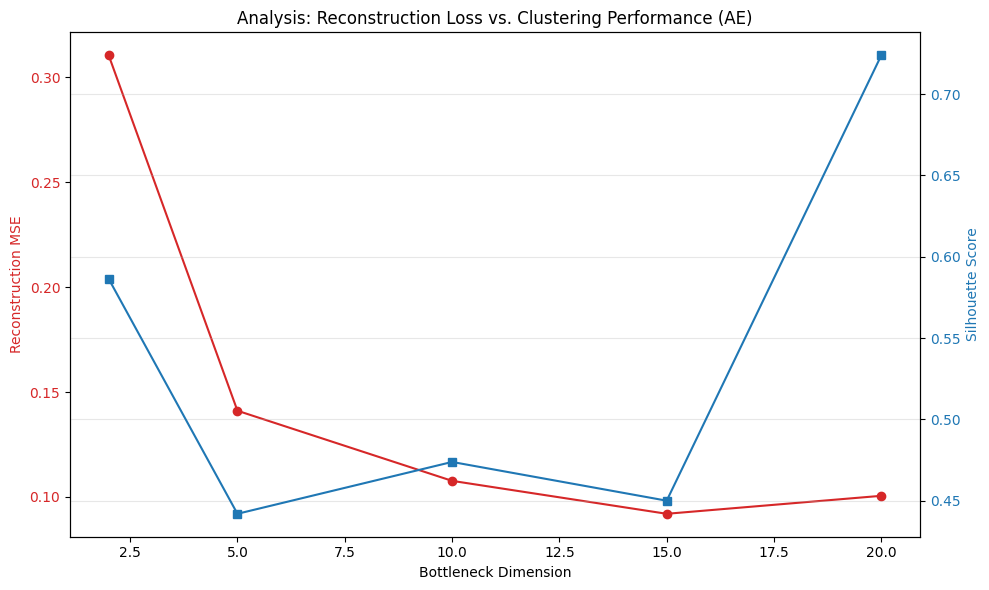

In [30]:

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Bottleneck Dimension')
ax1.set_ylabel('Reconstruction MSE', color='tab:red')
ax1.plot(df_exp5['Bottleneck_Dim'], df_exp5['Reconstruction_MSE'], color='tab:red', marker='o', label='MSE')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:blue')
ax2.plot(df_exp5['Bottleneck_Dim'], df_exp5['Silhouette'], color='tab:blue', marker='s', label='Silhouette')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Analysis: Reconstruction Loss vs. Clustering Performance (AE)')
fig.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

## Experiment 6: GMM after Autoencoder

In [27]:
def relu(z): return np.maximum(0, z)
def relu_deriv(z): return (z > 0).astype(float)  # 1 where z > 0, else 0 

def sigmoid(z): return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
def sigmoid_deriv(z): 
    s = sigmoid(z)
    return s * (1 - s)
def linear(z): return z
def linear_deriv(z): return np.ones_like(z)

def tanh(z): return np.tanh(z)
def tanh_deriv(z): return 1 - np.tanh(z)**2

=== Running Experiment 6: GMM after Autoencoder ===

Processing Bottleneck Dim: 2...

Processing Bottleneck Dim: 5...

Processing Bottleneck Dim: 10...

Processing Bottleneck Dim: 15...

Processing Bottleneck Dim: 20...


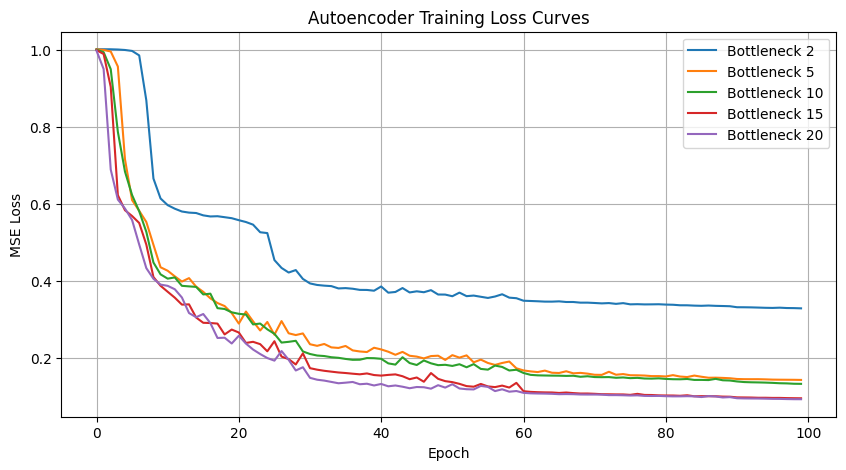

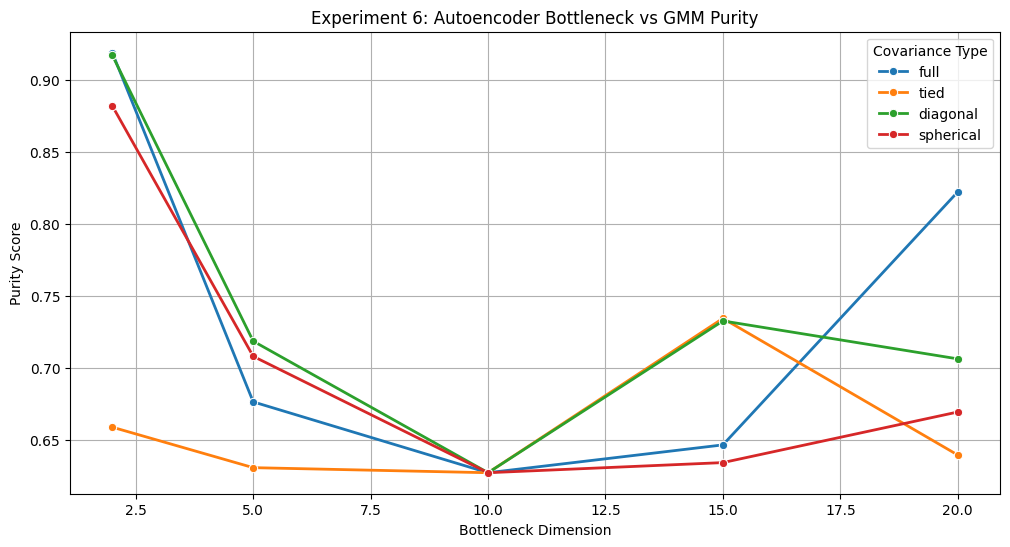


=== Best Exp 6 Config: Dim=2, Cov=full ===
Latent Dim                      2
Covariance Type              full
Purity                   0.919156
ARI                      0.700834
NMI                      0.578717
Silhouette               0.502469
Davies-Bouldin           0.832532
Calinski-Harabasz      418.585821
WCSS                  1199.793638
Reconstruction MSE       0.328147
Log-Likelihood       -1365.004911
BIC                   2799.792506
AIC                   2752.009821
Name: 0, dtype: object

Confusion Matrix for Best Model:
[[ 20 337]
 [186  26]]


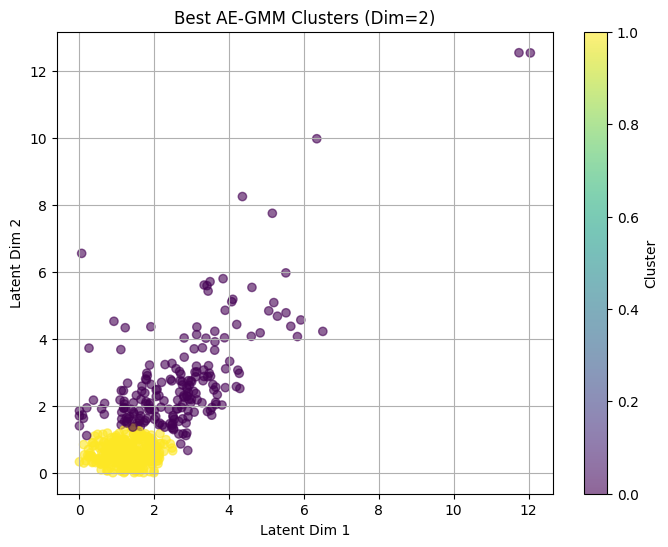


Purity Scores by Dimension and Covariance Type:
Latent Dim             2         5         10        15        20
Covariance Type                                                  
diagonal         0.917399  0.718805  0.627417  0.732865  0.706503
full             0.919156  0.676626  0.627417  0.646749  0.822496
spherical        0.882250  0.708260  0.627417  0.634446  0.669596
tied             0.659051  0.630931  0.627417  0.734622  0.639719


In [28]:
from src.dimensionality_reduction.autoencoder import AutoEncoder


# Imports (Ensure these are loaded)
from src.clustering.gmm import GMM_Scratch
from src.dimensionality_reduction.pca import PCA # For visualization only
from src.metrics.external import (
    purity_score_scratch, 
    adjusted_rand_index_scratch, 
    normalized_mutual_information_scratch
)
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch,
    calculate_gmm_metrics,
    calculate_wcss
)

print("=== Running Experiment 6: GMM after Autoencoder ===")

# --- 1. Settings from Exp 5 ---
bottleneck_dims = [2, 5, 10, 15, 20]
input_dim = X_scaled.shape[1]
gmm_k = 2  # Malignant vs Benign
cov_types = ['full', 'tied', 'diagonal', 'spherical']

results_exp6 = []
loss_histories = {}

# Variables to store the best result for final visualization
best_exp6_purity = -1
best_exp6_config = None
best_labels = None
best_X_encoded = None

# --- 2. Main Loop Over Bottleneck Dimensions ---
for b_dim in bottleneck_dims:
    print(f"\nProcessing Bottleneck Dim: {b_dim}...")

    # A. Define Architecture (Matches your Exp 5)
    # Input -> 64 -> 32 -> Bottleneck -> 32 -> 64 -> Input
    layers = [input_dim, 64, 32, b_dim, 32, 64, input_dim]
    
    # Activations (Matches your Exp 5)
    activations = [
        (tanh, tanh_deriv),      # Layer 0: Input -> 64
        (relu, relu_deriv),      # Layer 1: 64 -> 32
        (relu, relu_deriv),      # Layer 2: 32 -> Bottleneck (Latent)
        (relu, relu_deriv),      # Layer 3: Bottleneck -> 32
        (tanh, tanh_deriv),      # Layer 4: 32 -> 64
        (linear, linear_deriv)
    ]

    # B. Train Autoencoder
    ae = AutoEncoder(layers, activations, lr=0.01, l2=0.001)
    ae.train(X_scaled, epochs=100, batch_size=32, step_size=30, gamma=0.7)
    
    loss_histories[b_dim] = ae.losses
    final_loss = ae.losses[-1]

    # C. Extract Latent Features (Manual Forward Pass to Bottleneck)
    # We need to pass data through the first 3 layers (Indices 0, 1, 2)
    
    # Layer 0 (Input -> 64)
    Z0 = X_scaled @ ae.W[0] + ae.b[0]
    A0 = activations[0][0](Z0)
    
    # Layer 1 (64 -> 32)
    Z1 = A0 @ ae.W[1] + ae.b[1]
    A1 = activations[1][0](Z1)
    
    # Layer 2 (32 -> Bottleneck)
    Z2 = A1 @ ae.W[2] + ae.b[2]
    X_encoded = activations[2][0](Z2) # This is our Latent Representation
    
    # D. Train GMM on Latent Features
    for cov_type in cov_types:
        # Train
        gmm = GMM_Scratch(n_components=gmm_k, max_iter=100, tol=1e-4, covariance_type=cov_type)
        gmm.fit(X_encoded)
        y_pred = gmm.predict(X_encoded)
        final_ll = gmm.log_likelihood_history[-1]
        
        # --- Calculate All Metrics ---
        # 1. External
        purity = purity_score_scratch(y, y_pred)
        ari = adjusted_rand_index_scratch(y, y_pred)
        nmi = normalized_mutual_information_scratch(y, y_pred)
        
        # 2. Internal
        sil = silhouette_score_scratch(X_encoded, y_pred)
        db = davies_bouldin_score_scratch(X_encoded, y_pred)
        ch = calinski_harabasz_score_scratch(X_encoded, y_pred)
        
        # 3. GMM Specific (BIC/AIC) & WCSS
        gmm_metrics = calculate_gmm_metrics(X_encoded, final_ll, gmm_k, cov_type)
        wcss = calculate_wcss(X_encoded, y_pred, gmm.means)
        
        # Check for Best Model
        if purity > best_exp6_purity:
            best_exp6_purity = purity
            best_exp6_config = (b_dim, cov_type)
            best_labels = y_pred
            best_X_encoded = X_encoded

        results_exp6.append({
            'Latent Dim': b_dim,
            'Covariance Type': cov_type,
            'Purity': purity,
            'ARI': ari,
            'NMI': nmi,
            'Silhouette': sil,
            'Davies-Bouldin': db,
            'Calinski-Harabasz': ch,
            'WCSS': wcss,
            'Reconstruction MSE': final_loss,
            'Log-Likelihood': final_ll,
            'BIC': gmm_metrics['BIC'],
            'AIC': gmm_metrics['AIC']
        })

# --- 3. ANALYSIS & VISUALIZATION ---
df_exp6 = pd.DataFrame(results_exp6)

# 1. Training Loss Curves
plt.figure(figsize=(10, 5))
for dim in bottleneck_dims:
    plt.plot(loss_histories[dim], label=f'Bottleneck {dim}')
plt.title('Autoencoder Training Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Purity Comparison (Dim vs Covariance Type)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_exp6, x='Latent Dim', y='Purity', hue='Covariance Type', marker='o', linewidth=2)
plt.title('Experiment 6: Autoencoder Bottleneck vs GMM Purity')
plt.xlabel('Bottleneck Dimension')
plt.ylabel('Purity Score')
plt.grid(True)
plt.show()

# 3. Report Best Configuration
print(f"\n=== Best Exp 6 Config: Dim={best_exp6_config[0]}, Cov={best_exp6_config[1]} ===")
best_row = df_exp6.loc[(df_exp6['Latent Dim'] == best_exp6_config[0]) & 
                       (df_exp6['Covariance Type'] == best_exp6_config[1])].iloc[0]
print(best_row)

# 4. Confusion Matrix (Best Model)
print("\nConfusion Matrix for Best Model:")
print(confusion_matrix(y, best_labels))

# 5. 2D Projection of Best Latent Space 
# If latent dim > 2, we use PCA to project to 2D for visualization
if best_exp6_config[0] > 2:
    pca_viz = PCA(n_components=2)
    X_viz = pca_viz.fit_transform(best_X_encoded)
else:
    X_viz = best_X_encoded

plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=best_labels, cmap='viridis', alpha=0.6)
plt.title(f'Best AE-GMM Clusters (Dim={best_exp6_config[0]})')
plt.xlabel('Latent Dim 1')
plt.ylabel('Latent Dim 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# 6. Detailed Pivot Table
print("\nPurity Scores by Dimension and Covariance Type:")
print(df_exp6.pivot(index='Covariance Type', columns='Latent Dim', values='Purity'))